<a href="https://colab.research.google.com/github/NicoEssi/DD2421_Machine_Learning/blob/master/Lab_1_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Course: DD2421, Machine Learning
### Group: Nicolas Essipova & Mikel Zhobro
### Lab 1: Decision Trees



---



In [1]:
# Files
!wget https://raw.githubusercontent.com/NicoEssi/DD2421_Machine_Learning/master/monkdata.py
!wget https://raw.githubusercontent.com/NicoEssi/DD2421_Machine_Learning/master/dtree.py

# Dependencies
import matplotlib.pyplot as plt
import monkdata as m
import random
import dtree as d
import numpy as np
import pandas as pd

# Data
monks = [m.monk1, m.monk2, m.monk3]
monks_test = [m.monk1test, m.monk2test, m.monk3test]

--2020-01-31 15:54:40--  https://raw.githubusercontent.com/NicoEssi/DD2421_Machine_Learning/master/monkdata.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70459 (69K) [text/plain]
Saving to: ‘monkdata.py’

monkdata.py         100%[===================>]  68.81K  --.-KB/s    in 0.02s   

2020-01-31 15:54:40 (4.07 MB/s) - ‘monkdata.py’ saved [70459/70459]

--2020-01-31 15:54:41--  https://raw.githubusercontent.com/NicoEssi/DD2421_Machine_Learning/master/dtree.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3901 (3.8K) [text/plain]
Savin

# Assignment 1:

Define a function entropy which
calculates the entropy of a dataset. Import this file along with the
monks datasets and use it to calculate the entropy of the training
datasets.

In [4]:
def compute_entropy():
  # Computing entropy for each dataset
  for i in range(3):
    print("Entropy in MONK-" + str(i) + ": "+ str(d.entropy(monks[i])))

compute_entropy()

Entropy in MONK-0: 1.0
Entropy in MONK-1: 0.957117428264771
Entropy in MONK-2: 0.9998061328047111


# Assignment 3:

 Use the function averageGain (defined in dtree.py)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you
can access via m.attributes[0], ..., m.attributes[5]. Based on
the results, which attribute should be used for splitting the examples
at the root node?

In [5]:
def compute_gain():
  gains = pd.DataFrame(columns = ['Dataset','a1', 'a2', 'a3','a4', 'a5', 'a6'])
  
  # Computing average gain for each dataset
  for i in range(3):
    i_gain = {}
    i_gain["Dataset"] = ["MONK-{}".format(i+1)]
    
    # Computing average gain for each attribute
    for j in range(6):
      i_gain["a{}".format(j+1)] = round(d.averageGain(monks[i], m.attributes[j]), 10)

    # Appending results to dataframe
    i_df = pd.DataFrame(i_gain)
    gains = gains.append(i_df)

  return gains


compute_gain()

,Dataset,a1,a2,a3,a4,a5,a6
0,MONK-1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
0,MONK-2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
0,MONK-3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


# Assignment 5:

Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.
For example to built a tree for monk1 and compute the performance
on the test data you could use

```
import monkdata as m
import dtree as d
t=d.buildTree(m.monk1, m.attributes);
print(d.check(t, m.monk1test))
```

Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.

In [6]:
def compute_errors():
  errors = pd.DataFrame(columns = ['Dataset', 'Error (train)', 'Error (test)'])

  # Computing error for each dataset
  for i in range(3):
    i_error = {}
    i_error["Dataset"] = ["MONK-{}".format(i+1)]

    # Error for training set
    i_error["Error (train)"] = 1 - d.check(d.buildTree(monks[i], m.attributes),
                                           monks[i])
    
    # Error for test set
    i_error["Error (test)"] = 1 - d.check(d.buildTree(monks[i], m.attributes),
                                          monks_test[i])
    
    # Appending results to dataframe
    df_error = pd.DataFrame(i_error)
    errors = errors.append(df_error)

  return errors


compute_errors()

,Dataset,Error (train),Error (test)
0,MONK-1,0.0,0.171296
0,MONK-2,0.0,0.307870
0,MONK-3,0.0,0.055556


# Assignment 7:

Evaluate the effect pruning has on the test error for
the monk1 and monk3 datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
fraction. Plot the classification error on the test sets as a function
of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.

Note that the split of the data is random. We therefore need to
compute the statistics over several runs of the split to be able to draw
any conclusions. Reasonable statistics includes mean and a measure
of the spread. Do remember to print axes labels, legends and data
points as you will not pass without them.

MONK-1; a1, a2, a3, a4, a5, a6
Mean: [0.23168981 0.20645833 0.17798611 0.15300926 0.14296296 0.14428241]
Std: [0.04389135 0.04790235 0.04308901 0.04318169 0.04493976 0.05118835]

MONK-3; a1, a2, a3, a4, a5, a6
Mean: [0.08837963 0.07520833 0.06310185 0.05159722 0.05539352 0.0512963 ]
Std: [0.05636788 0.04518516 0.0342571  0.02766237 0.03045764 0.02912387]


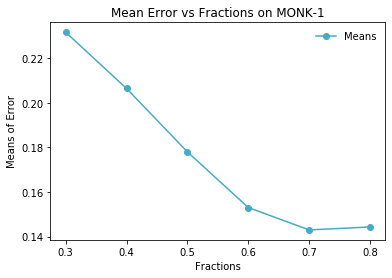

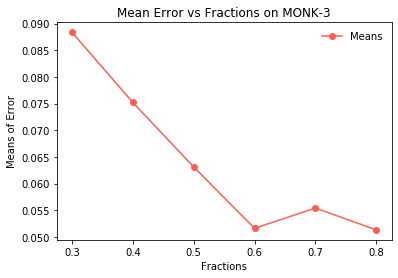

In [7]:
# Shuffle and split the data up by a random percentage
def partition(data, fraction):
  ldata = list(data)
  random.shuffle(ldata)
  breakPoint = int(len(ldata) * fraction)
  return ldata[:breakPoint], ldata[breakPoint:]


# Prune the trees
def prune_trees(data, test):
  fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
  pruned = []

  for fraction in fractions:
    train, validate = partition(data, fraction)
    tree = d.buildTree(train, m.attributes)
    forest = d.allPruned(tree)
    best_perf = d.check(tree, validate)

    temp_tree = 0
    best_tree = tree

    for t in forest:
      temp_perf = d.check(t, validate)
      if best_perf < temp_perf:
        best_perf = temp_perf
        best_tree = t

    pruned.append(1 - d.check(best_tree, test))

  return pruned


# Evaluation of pruning
# Will print out mean and std for each dataset,
# along with plotting the error for each dataset.
def evaluate_pruning():
  fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
  monk1_pruned = []
  monk3_pruned = []

  for i in range(100):
    monk1_pruned.append(prune_trees(m.monk1, m.monk1test))
    monk3_pruned.append(prune_trees(m.monk3, m.monk3test))

  monk1_pruned = np.transpose(monk1_pruned)
  monk3_pruned = np.transpose(monk3_pruned)

  mean1 = np.mean(monk1_pruned, axis=1)
  mean3 = np.mean(monk3_pruned, axis=1)
  std1 = np.std(monk1_pruned, axis=1)
  std3 = np.std(monk3_pruned, axis=1)

  print("MONK-1; a1, a2, a3, a4, a5, a6" +\
        "\nMean: " + str(mean1) + "\nStd: " + str(std1) + \
        "\n\nMONK-3; a1, a2, a3, a4, a5, a6" +\
        "\nMean: " + str(mean3) + "\nStd: " + str(std3))

  complete_tree1 = d.buildTree(m.monk1, m.attributes)
  complete_tree3 = d.buildTree(m.monk3, m.attributes)

  plt.plot(fractions, mean1, color='#49abc2', marker='o', label="Means")
  plt.title("Mean Error vs Fractions on MONK-1")
  plt.xlabel("Fractions")
  plt.ylabel("Means of Error")
  plt.legend(loc='upper right', frameon=False)
  plt.show()

  plt.plot(fractions, mean3, color='#fe5f55', marker='o', label="Means")
  plt.title("Mean Error vs Fractions on MONK-3")
  plt.xlabel("Fractions")
  plt.ylabel("Means of Error")
  plt.legend(loc='upper right', frameon=False)
  plt.show()


evaluate_pruning()